In [1]:
%matplotlib widget

from __future__ import unicode_literals
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.utils.data

from itertools import product
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
import matplotlib.patches as patches
import types, io, os, time, math, inspect
from importlib import reload
import moviepy.editor as mpy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import animation as animation_plt
from matplotlib import rc
from IPython import display
from IPython.display import HTML, clear_output
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

from utilities.render_utils import figure_compiler_video
from utilities.os_utils import mkdir_p
from utilities.general_utils import dict_append
from utilities.gym_utils import get_space_shape, get_angle
from gym_envs.legged import robotBulletEnv
import threading

#from PPO import mycumprodsum, mycumprodsum_rev, init_weights, run_ppo_experiment
#from PPO import tester_env_class, mean_std_val_net_v1, mean_std_val_net_v2, mean_std_val_net_v3

In [2]:
torch.set_num_threads(4)

In [3]:
%load_ext autoreload
%autoreload 1
import PPO
import gym_envs.legged
%aimport gym_envs.legged, PPO

mse_loss = torch.nn.MSELoss(reduction='elementwise_mean')
softplus = nn.Softplus()
tanh = nn.Tanh()
sigmoid = nn.Sigmoid()

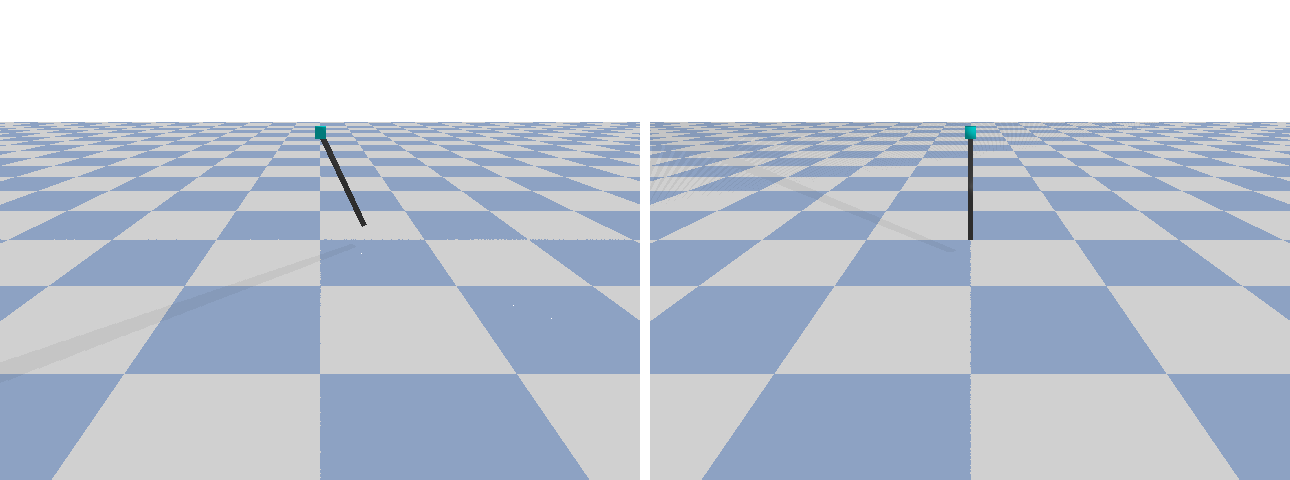

120
    Action std  Clip loss    Reward  Total loss  Value loss       a-0       s-0       s-1       s-2       s-3
0     1.139147   0.008596  0.010876   -0.008286    0.000310  0.014601  0.882235  0.372626 -0.045326  0.002189
1     1.166633   0.007690  0.010184   -0.007580    0.000110  0.080506  0.931204  0.183563  0.262817  0.001647
2     1.126974  -0.005609  0.009746    0.005688    0.000079 -0.397503  0.921067 -0.022391 -0.597801 -0.004229
3     1.152043   0.006361  0.010657   -0.006197    0.000164 -0.005243  0.895005 -0.378298 -0.096802 -0.000887
4     1.177265  -0.005374  0.009226    0.005383    0.000009  0.250916  0.921172  0.201051  0.440540  0.002841
5     1.148070  -0.005159  0.010210    0.005194    0.000034 -0.304736  0.953765 -0.171778 -0.255012 -0.001641
6     1.163944   0.007800  0.011272   -0.007774    0.000026  0.025631  0.961559 -0.184125  0.085777  0.000401
7     1.159547  -0.001471  0.010999    0.001477    0.000007  0.113701  0.939791 -0.267469  0.002967 -0.000378
8     

FigureCanvasNbAgg()

In [4]:
#Running the default setting
robotBulletEnv = gym_envs.legged.robotBulletEnv

import pybullet as p
def my_env_maker():
    env = gym.make('Pendulum-v0')
    env.time_step = env.env.dt
    return env

urdfs_path = '/home/cslcollab-ghaffri/Sadaf/Software/twoBitToFasta/projs/1/Project/pybulletfiles/organizedfiles/urdf'
#robot_urdf, controllable_joints = urdfs_path + '/mono_crudeshapes.urdf', [1,2]
robot_urdf, controllable_joints = urdfs_path + '/pendulum.urdf', [0]
#robot_urdf, controllable_joints = '/home/ehsans2/projects/robotrl/urdf/mono_updown.urdf' , [0]
torch.set_num_threads(4)
x = PPO.run_ppo_experiment( N = 1,
                            use_threads=False, #Doesn't work well
                            print_runningtime=False,
                            T = 12,#32
                            K = 2,
                            gamma = 0.9,
                            lamda = 1,
                            epsilon = 0.02,
                            num_loops = 30000,
                            batch_size = 4,
                            c_1 = 1,
                            c_2 = 0,
                            seperate_val_net = True,
                            reward_shaping = lambda r: r*0.01,
                            action_sigma = None,
                            max_ep_len = 120,
                            learning_rate = 0.001,
                            action_mean_transformation = lambda proposed_act_mean: tanh(proposed_act_mean) * 2. ,
                            action_std_transformation = lambda proposed_act_std: sigmoid( proposed_act_std / 5.) * 2,
                            #action_std_transformation = lambda proposed_act_std: softplus(proposed_act_std), #Softplus could generate large numbers that would corrupt the sim
                            neural_net_maker = lambda *args, **kwargs: PPO.mean_std_val_net_v3(*args, **{**kwargs, **dict(hidden_layers_units = [100], activation_fn = nn.Tanh)}),
                            #Environment_Maker = lambda : my_env_maker()).ipython_display()
                            Environment_Maker = lambda : robotBulletEnv(gui=False, time_step = 0.2, robot_urdf = robot_urdf, t_res = 48,
                                                                        controllable_joints=controllable_joints, control_mode = p.VELOCITY_CONTROL))
if 'gifclip' in x:
    x['gifclip'].ipython_display()

In [26]:
x['gifclip'].ipython_display()

100%|██████████| 119/119 [00:00<00:00, 128.96it/s]


In [ ]:
x['curr_a_t']
#x['main_net'](x['s_tensor'])
#list(x['main_nnet'].parameters())

In [ ]:
np.array(x['env_list'][0].exp_history[-2]['state']) 
#action logstd
#np.array(x[0].exp_history[-2]['network action mean']) 

In [ ]:
#Running the default setting
robotBulletEnv = gym_envs.legged.robotBulletEnv

import pybullet as p
def my_env_maker():
    env = gym.make('Pendulum-v0')
    env.time_step = env.env.dt
    return env

#robot_urdf = '/home/ehsans2/projects/robotrl/urdf/mymonoped_handed.urdf'
robot_urdf = '/home/ehsans2/projects/robotrl/urdf/mono_updown.urdf'
torch.set_num_threads(4)
x = PPO.run_ppo_experiment( N = 4,
                            use_threads=False, #Doesn't work well
                            print_runningtime=False,
                            T = 10,#32
                            K = 2,
                            gamma = 0.9,
                            lamda = 1,
                            epsilon = 0.2,
                            num_loops = 30000,
                            batch_size = 32,
                            c_1 = 1,
                            c_2 = 0,
                            seperate_val_net = True,
                            reward_shaping = lambda r: r*0.1/3,
                            action_sigma = None,
                            max_ep_len = 200,
                            learning_rate = 0.001,
                            action_mean_transformation = lambda proposed_act_mean: tanh(proposed_act_mean / 5.) * 30. ,
                            action_std_transformation = lambda proposed_act_std: sigmoid( proposed_act_std / 5.) * 1.,
                            #action_std_transformation = lambda proposed_act_std: softplus(proposed_act_std), #Softplus could generate large numbers that would corrupt the sim
                            neural_net_maker = lambda s_dim, out_dim: mean_std_val_net_v3(s_dim, out_dim, hidden_layers_units = [200], activation_fn = nn.Tanh),
                            #Environment_Maker = lambda : my_env_maker()).ipython_display()
                            Environment_Maker = lambda : robotBulletEnv(gui=False, time_step = 0.01, robot_urdf = robot_urdf, t_res = 20,
                                                                        controllable_joints=[1,2], control_mode = p.TORQUE_CONTROL))
x.ipython_display()

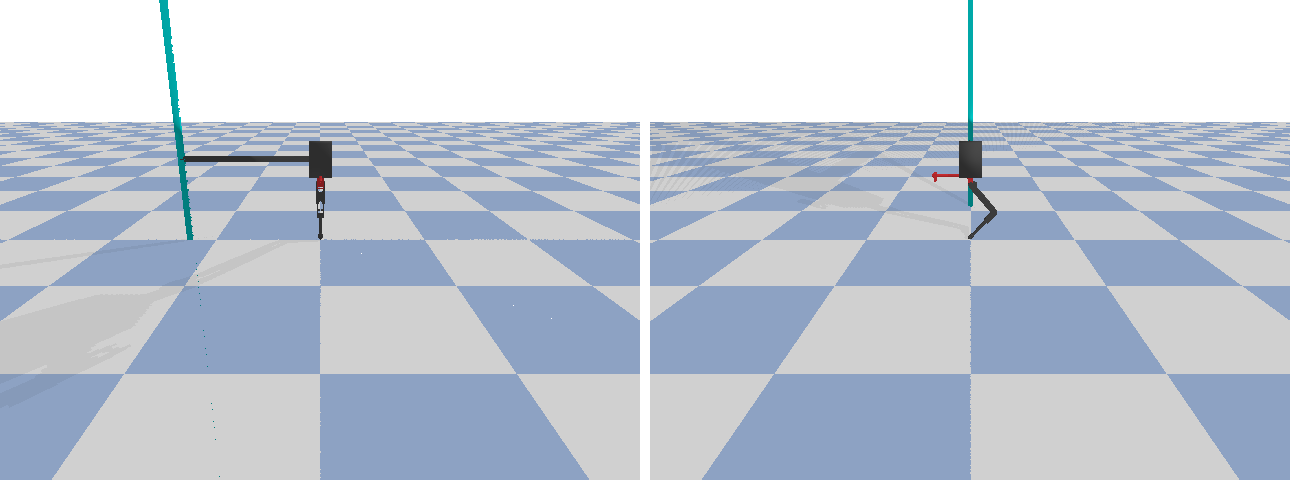

In [56]:
robot_urdf = '/home/ehsans2/projects/robotrl/urdf/mymonoped_slider.urdf'
import pybullet as p
import IPython.display
import PIL.Image

env = robotBulletEnv(gui=False, time_step = 0.001, t_res = 1, robot_urdf = robot_urdf, controllable_joints=[2,3,4], control_mode = p.POSITION_CONTROL)
env.reset()
env.viz_util.unhide_all()
disp_np_im = lambda np_im: IPython.display.display(PIL.Image.fromarray(np_im.astype(np.uint8)))
for i in range(5000):
    env.step(action=[0,-.7,+1.4])#np.random.uniform(-1,1,3))#

disp_np_im(env.render())

#p.getLinkState(env.robot, linkIndex=0, computeLinkVelocity=True, physicsClientId = env.physicsClientId)

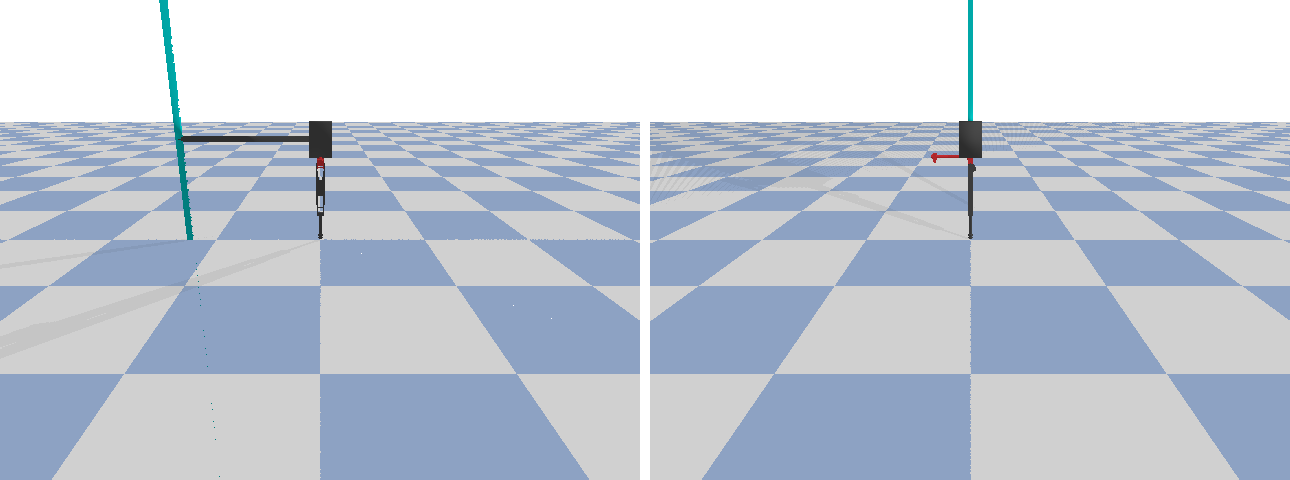

In [57]:
for i in range(5000):
    env.step(action=[0,0,0])#np.random.uniform(-1,1,3))#

disp_np_im(env.render())

In [13]:
import baseline

ModuleNotFoundError: No module named 'baseline'

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super().__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.layers = []
        self.layers.append(nn.Conv2d(1, 6, 5))
        self.layers.append(nn.Conv2d(6, 16, 5))
        # an affine operation: y = Wx + b
        self.layers.append(nn.Linear(16 * 5 * 5, 120))
        self.layers.append(nn.Linear(120, 84))
        self.layers.append(nn.Linear(84, 10))
        self.all_net = nn.Sequential(*self.layers)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.layers[0](x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.layers[1](x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.layers[2](x))
        x = F.relu(self.layers[3](x))
        x = self.layers[4](x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
net.__dict__

{'_backend': <torch.nn.backends.thnn.THNNFunctionBackend at 0x7fe1b794d630>,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('all_net', Sequential(
                 (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
                 (1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
                 (2): Linear(in_features=400, out_features=120, bias=True)
                 (3): Linear(in_features=120, out_features=84, bias=True)
                 (4): Linear(in_features=84, out_features=10, bias=True)
               ))]),
 'training': True,
 'layers': [Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)),
  Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)),
  Linear(in_features=400, out_features=120, bias=True),
  Linear(in_features=120, out_features=84, bias=True),
  Linear(in_features=84, out_features=10, bias=True)]}